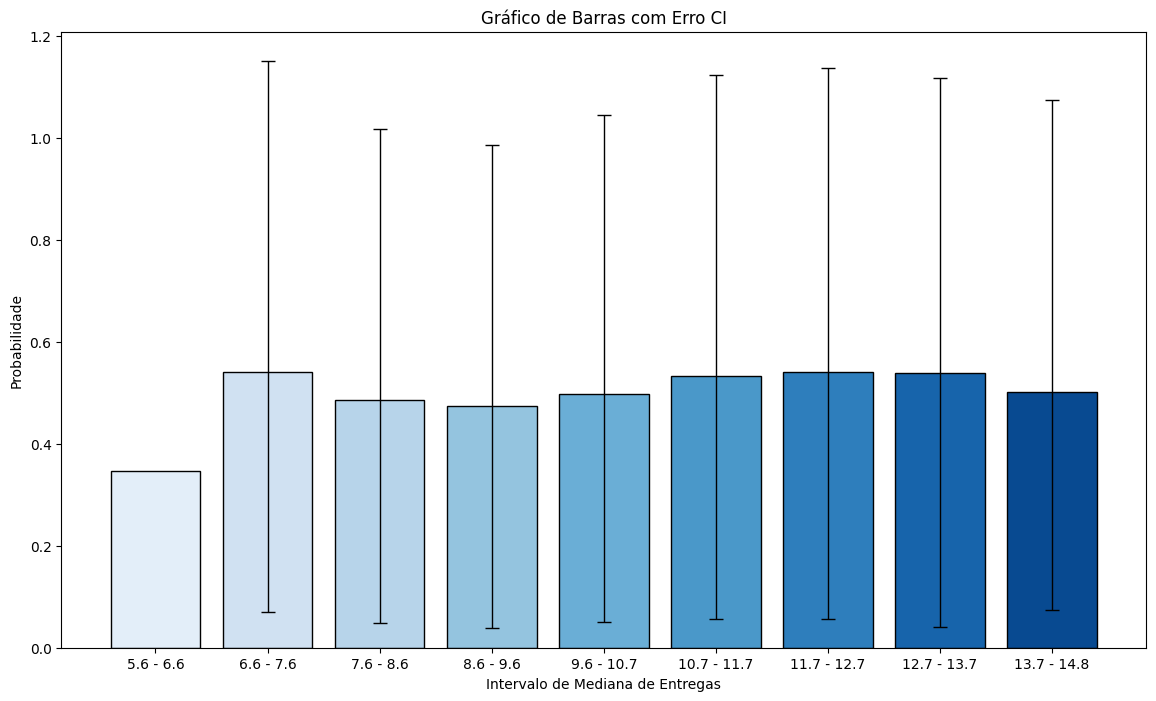

In [15]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    

fig = plt.gcf()
fig.set_size_inches(14, 8)
variavel_x = 'ENTREGAS'
variavel_y = 'PROB_VAL'

# Gerar dados de exemplo a partir de um dataframe
np.random.seed(0)
df = pd.DataFrame({variavel_y: np.random.normal(loc=0.5, scale=0.1, size=100),
                   variavel_x: np.random.normal(loc=10, scale=2, size=100)})

def grafico_barras_com_erros_para_cada_intervalo_da_abscissa(df, variavel_x, variavel_y):
    
    fig = plt.gcf()
    fig.set_size_inches(14, 8)
    # Agrupar os dados por intervalos
    bins = np.linspace(start=df[variavel_x].min(), stop=df[variavel_x].max(), num=10)
    x_binned = np.digitize(df[variavel_x], bins)

    # Calcular a média e o erro CI para cada intervalo
    medians = []
    cis = []
    for i in range(1, len(bins)):
        x_i = df[x_binned == i][variavel_y]
        median = x_i.median()
        cis.append(1.96 * x_i.std() / np.sqrt(len(x_i)))
        medians.append(median)

    medians = np.array(medians)
    cis = np.array(cis)

    # Criar um dataframe com os resultados
    df = pd.DataFrame({'median': medians, 'lower': medians - cis, 'upper': medians + cis})
    df['x_binned'] = [f'{bins[i - 1]:.1f} - {bins[i]:.1f}' for i in range(1, len(bins))]

    # Definir a paleta de cores
    colors = sns.color_palette("Blues", n_colors=len(df))

    # Plotar o gráfico de barras com erro CI
    plt.bar(x=np.arange(len(df)), height=df['median'], color=colors, edgecolor='black', linewidth=1)
    plt.errorbar(x=np.arange(len(df)), y=df['median'], yerr=(df['lower'], df['upper']),
                 fmt='none', ecolor='black', capsize=5, elinewidth=1)


    # Adicionar rótulos e outros ajustes de visualização
    plt.xlabel('Intervalo de Mediana de Entregas')
    plt.ylabel('Probabilidade')
    plt.title('Gráfico de Barras com Erro CI')
    plt.xticks(np.arange(len(df)), df['x_binned'], rotation=0)


    plt.show()

grafico_barras_com_erros_para_cada_intervalo_da_abscissa(df, variavel_x, variavel_y)
